In [3]:
# import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import numpy as np

In [21]:
# load_data
drugs_data = pd.read_csv('Data/drugs_cleaned.csv')
homeless_data = pd.read_csv('Data/homeless_clean.csv')
household_debt_data = pd.read_csv('Data/household_debt_cleaned.csv')
poverty_data = pd.read_csv('Data/poverty_clean.csv')

poverty_data = poverty_data[poverty_data['Percent in poverty'].notna()]



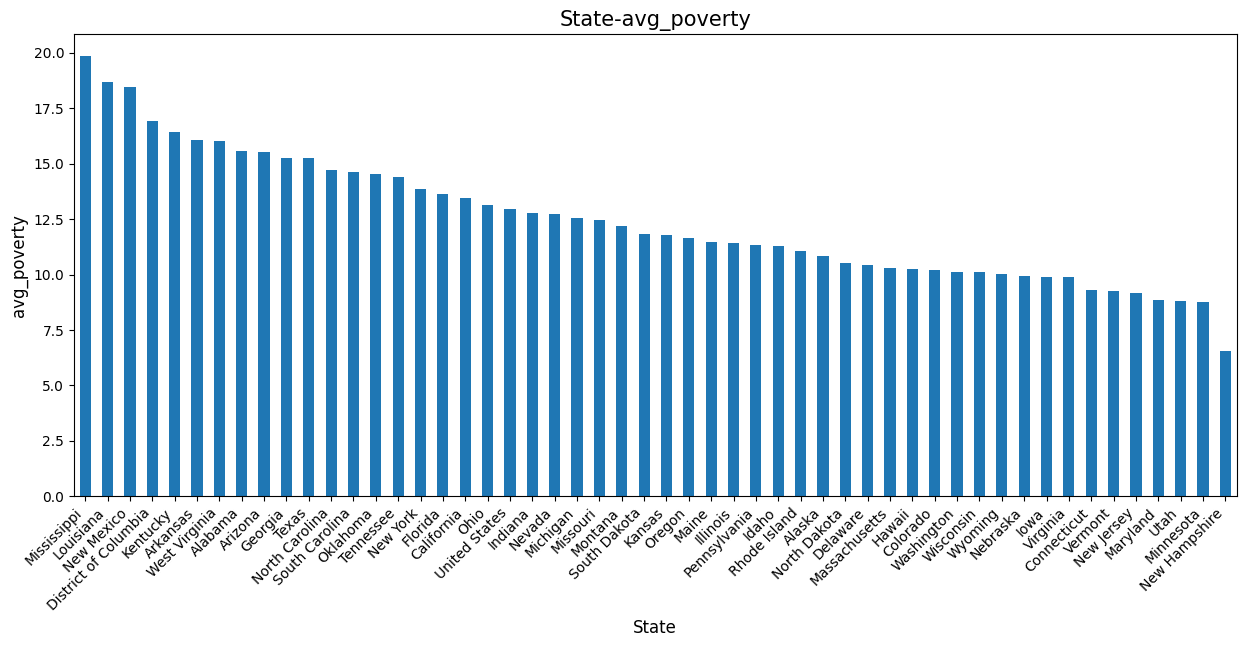

In [22]:
plt.figure(figsize=(15, 6))  
state_avg = poverty_data.groupby('State')['Average_rate_of_poverty'].mean().sort_values(ascending=False)  
state_avg.plot(kind='bar')  
plt.title('State-avg_poverty', fontsize=15)  
plt.xlabel('State', fontsize=12)  
plt.ylabel('avg_poverty', fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.show()

In [23]:
# combine all data
dataset = pd.read_csv('Data/combined_data.csv')
inflation_data = pd.read_csv('Data/inflation_clean.csv')
rpp_data = pd.read_csv('Data/rpp_clean.csv')
population_data = pd.read_csv('Data/state_population.csv')
unemployment_data = pd.read_csv('Data/state_unemployment_clean.csv')
dataset.columns = dataset.columns.str.lower()
dataset = dataset.merge(inflation_data, on=['state', 'year'])
dataset = dataset.merge(rpp_data, on=['state', 'year'])
dataset = dataset.merge(population_data, on=['state', 'year'])
dataset = dataset.merge(unemployment_data, on=['state', 'year'])
dataset.head()

,year,state,overall_homeless,total_poverty_population,total_drug_population,average_debt,inflation,overall_rpp,goods_rpp,housing_rpp,utilities_rpp,other_rpp,population,unemployment_rate
0,2017,Alaska,1845,719,585735,1.66,1.805090,104.864,107.743,109.381,123.114,101.790,740983,6.508333
1,2017,Alabama,3793,4801,4084713,1.45,1.199652,90.098,95.451,61.120,93.710,99.104,4877989,4.508333
2,2017,Arkansas,2467,2921,2488721,1.28,4.019182,88.607,94.500,57.640,83.149,98.283,3003855,3.741667
3,2017,California,131532,39250,33047069,1.78,1.749092,110.925,104.455,162.521,130.675,103.145,39337785,4.833333
4,2017,Colorado,10940,5527,4726440,1.78,2.199682,102.957,99.613,128.891,86.072,98.725,5617421,2.608333


In [24]:
dataset['homeless_rate'] = dataset['overall_homeless'] / dataset['population']
dataset['drug_rate'] = dataset['total_drug_population'] / dataset['population']
dataset['poverty_rate'] = dataset['total_poverty_population'] / dataset['population']
dataset['overall_rpp'] = dataset['overall_rpp'] / 100
dataset['goods_rpp'] = dataset['goods_rpp'] / 100
dataset['housing_rpp'] = dataset['housing_rpp'] / 100
dataset['utilities_rpp'] = dataset['utilities_rpp'] / 100
dataset['other_rpp'] = dataset['other_rpp'] / 100


dataset = dataset.drop(['overall_homeless', 'total_drug_population', 'total_poverty_population', 'population'], axis=1)
dataset.to_csv("Data/all_in_one_data.csv")
dataset.head()

,year,state,average_debt,inflation,overall_rpp,goods_rpp,housing_rpp,utilities_rpp,other_rpp,unemployment_rate,homeless_rate,drug_rate,poverty_rate
0,2017,Alaska,1.66,1.805090,1.04864,1.07743,1.09381,1.23114,1.01790,6.508333,0.002490,0.790484,0.000970
1,2017,Alabama,1.45,1.199652,0.90098,0.95451,0.61120,0.93710,0.99104,4.508333,0.000778,0.837376,0.000984
2,2017,Arkansas,1.28,4.019182,0.88607,0.94500,0.57640,0.83149,0.98283,3.741667,0.000821,0.828509,0.000972
3,2017,California,1.78,1.749092,1.10925,1.04455,1.62521,1.30675,1.03145,4.833333,0.003344,0.840085,0.000998
4,2017,Colorado,1.78,2.199682,1.02957,0.99613,1.28891,0.86072,0.98725,2.608333,0.001948,0.841390,0.000984


Correlation with poverty rate:
average_debt         0.108629
drug_rate            0.400139
goods_rpp            0.172706
homeless_rate        0.194495
housing_rpp          0.288250
inflation           -0.151751
other_rpp            0.228184
overall_rpp          0.276087
unemployment_rate   -0.093280
utilities_rpp        0.131096
dtype: float64


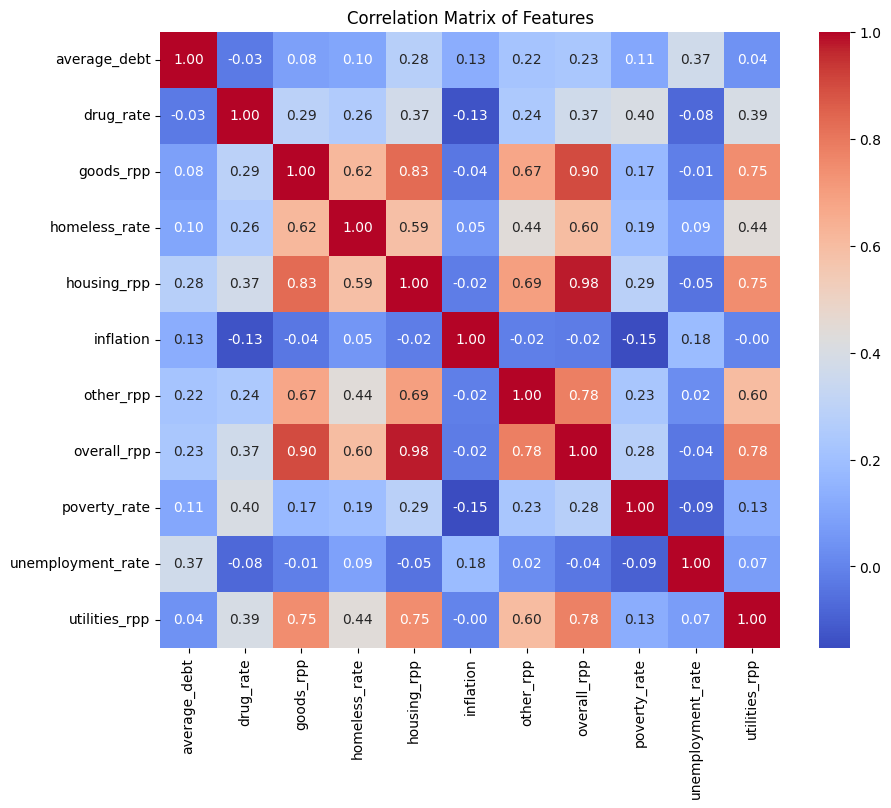

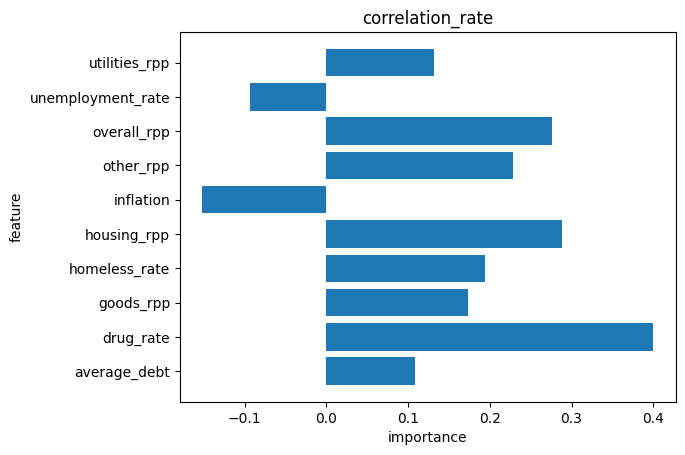


Linear Regression Coefficients:
average_debt: 2.372976729465748e-06
drug_rate: 0.0002433105290846334
goods_rpp: -7.729640472240487e-05
homeless_rate: 0.0010354161003293648
housing_rpp: -7.744910980330684e-07
inflation: -8.971719315733835e-07
other_rpp: 2.4378695273774507e-05
overall_rpp: 8.600574203445858e-05
unemployment_rate: -2.5566652325494675e-07
utilities_rpp: -1.6286514376654165e-05

Random Forest R^2 Score: 0.33916819190515357
average_debt: 0.04380358774681047
drug_rate: 0.3381797060777479
goods_rpp: 0.05385745402681661
homeless_rate: 0.07994959158514592
housing_rpp: 0.06975787502429279
inflation: 0.07530795589467205
other_rpp: 0.053077841393901176
overall_rpp: 0.056141842019180134
unemployment_rate: 0.10764161903325502
utilities_rpp: 0.12228252719817806


/var/folders/76/0w8ph1vx66x9f1czs7c403240000gn/T/ipykernel_75798/4051751779.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


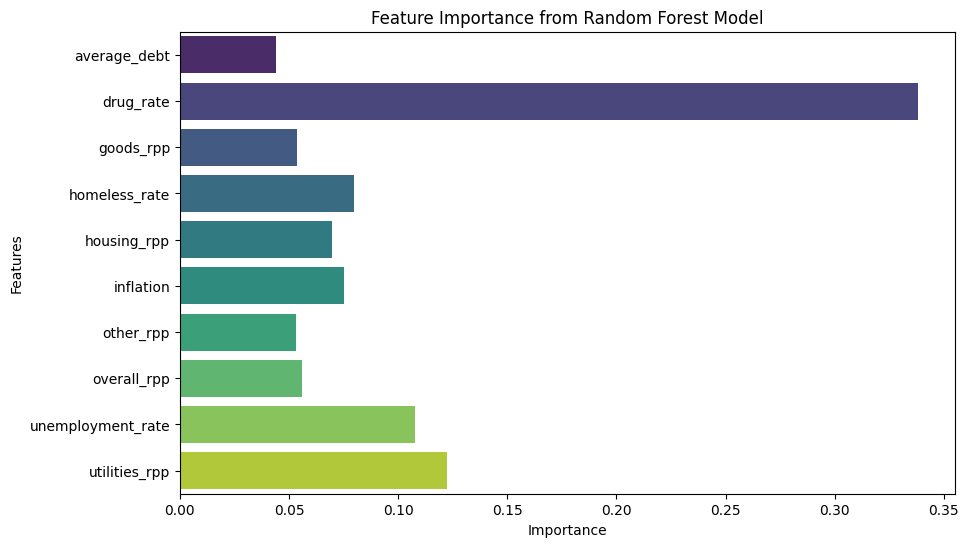

In [47]:

# 选择需要分析的列
features = dataset.columns.difference(['year', 'state', 'poverty_rate'])
X = dataset[features]
y = dataset['poverty_rate']
x_y = dataset[dataset.columns.difference(['year', 'state'])]

# 相关性矩阵
correlation_matrix = X.corrwith(y)
print("Correlation with poverty rate:")
print(correlation_matrix)

# 绘制相关性热图
plt.figure(figsize=(10, 8))
sns.heatmap(x_y.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 绘制相关性矩阵柱状图
plt.figure()
test = x_y.corr()['poverty_rate']
plt.barh(test[test.index!='poverty_rate'].index, test[test.index!='poverty_rate'].values)
plt.title('correlation_rate')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

# 线性回归模型
model = LinearRegression()
model.fit(X, y)
print("\nLinear Regression Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

# 特征重要性 - 使用随机森林
rf = RandomForestRegressor(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(f"\nRandom Forest R^2 Score: {r2_score(y_test, predictions)}")
importance = rf.feature_importances_
for feature, imp in zip(features, importance):
    print(f"{feature}: {imp}")

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, palette="viridis")
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

average_debt: [0.00666516 0.21673993]
average_debt has significant positive correlation with poverty rate.
inflation: [-0.26483145 -0.0408297 ]
inflation has significant negative correlation with poverty rate.
overall_rpp: [0.1652698  0.38673563]
overall_rpp has significant positive correlation with poverty rate.
goods_rpp: [0.05379578 0.28735328]
goods_rpp has significant positive correlation with poverty rate.
housing_rpp: [0.17591786 0.39151552]
housing_rpp has significant positive correlation with poverty rate.
utilities_rpp: [-0.00372466  0.26197092]
utilities_rpp has no significant correlation with poverty rate.
other_rpp: [0.11771115 0.33218912]
other_rpp has significant positive correlation with poverty rate.
unemployment_rate: [-0.19463769 -0.00145026]
unemployment_rate has significant negative correlation with poverty rate.
homeless_rate: [0.06419597 0.32313963]
homeless_rate has significant positive correlation with poverty rate.
drug_rate: [0.26972918 0.51677715]
drug_rate 

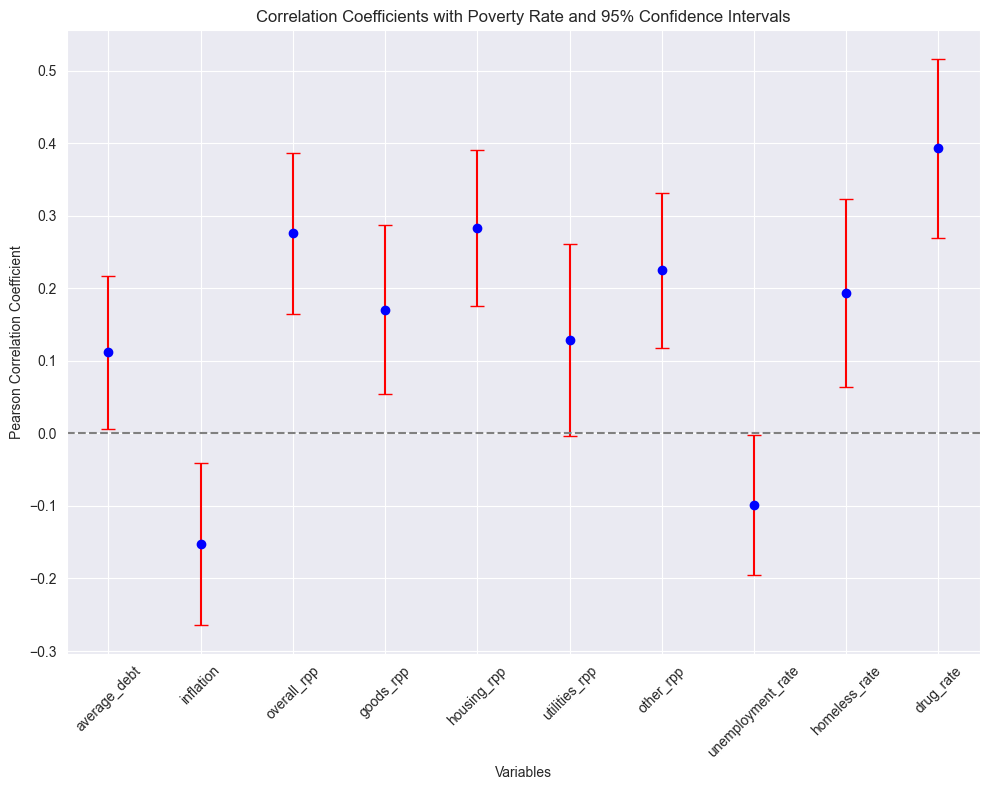

In [11]:
data = pd.read_csv('Data/all_in_one_data.csv')
def bootstrap_corr(data, sample_size,label_name,  n_iterations=1000):
    corrs = []
    for _ in range(n_iterations):
        sample = data.sample(sample_size, replace=True)
        corr, _ = pearsonr(sample[label_name], sample['poverty_rate'])
        corrs.append(corr)
    return np.percentile(corrs, [5, 95])
confidence_intervals = []
for i in data.columns[3:-1]:
    res = bootstrap_corr(data, 200, i)
    confidence_intervals.append(res)
    print(f"{i}: {res}")
    if res[0] < 0 < res[1]:
        print(f"{i} has no significant correlation with poverty rate.")
    elif 0 < res[0] < res[1]:
        print(f"{i} has significant positive correlation with poverty rate.")
    else:
        print(f"{i} has significant negative correlation with poverty rate.")

means = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals]
errors = [(ci[1] - ci[0]) / 2 for ci in confidence_intervals]

plt.figure(figsize=(10, 8))
plt.errorbar(data.columns[3:-1], means, yerr=errors, fmt='o', ecolor='red', capsize=5, color='blue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Correlation Coefficients with Poverty Rate and 95% Confidence Intervals')
plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()
